In [1]:
"""
jupyter notebook used for demonstration of the classification with the example data and the pre-trained model

author: Anton Thieme <anton@thiemenet.de>
"""

'\njupyter notebook used for demonstration of the classification with the example data and the pre-trained model\n\nauthor: Anton Thieme <anton@thiemenet.de>\n'

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import math
import scienceplots

from scipy import stats
from scipy.optimize import curve_fit, fmin_slsqp
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
from scipy.signal import argrelextrema, find_peaks
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from Analysis.Auxiliary import *
from Figures.Kinetics import *

%matplotlib inline

In [2]:
### DEFINE STATIC VARIABLES

# pyplot preferences
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['svg.fonttype'] = 'none'

# set path to example data which contains data from a 25% and a 75% MT chip
PATH_EXAMPLE = r"../data/Example_data/Classification"


EDGE_CUTOFF = 0.05

# frame at which classification should take place for 15h, 10min/frame experiments
CLASSIFY_FRAME_15h = 13 #2h

# continuous features
FEATURES_NORM = ['feat_fq_delta_final', 'feat_fq_delta_max', 'feat_fq_delta_avg', 'feat_fq_delta_area_final', 'feat_fq_delta_velocity_final',
       'feat_fq_delta_velocity_max', 'feat_fq_delta_velocity_min',
       'feat_fq_delta_velocity_avg']

# discrete features
FEATURES_ORIG = ['feat_fq_delta_tp_max',
       'feat_fq_delta_tp_min', 'feat_fq_delta_tp_avg', 'feat_fq_delta_velocity_tp_max',
       'feat_fq_delta_velocity_tp_min', 'feat_fq_delta_velocity_tp_avg', 'feat_tp_start_active']

In [3]:
# set path and load classifier
forest = load('../Model/forest.joblib')
scaler = load('../Model/scaler.joblib')
pca = load('../Model/pca.joblib')

Range: 880.1828544512093 - 1716.0264922504803
#####
[982.30813024]
[82166.36389785]
MT_25_WT_75


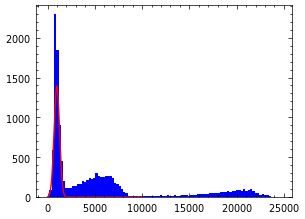

[1.69036708e-034 1.63908096e-083 0.00000000e+000 ... 0.00000000e+000
 4.29751043e-029 4.78402774e-219]
Range: 715.0407356722845 - 1409.546053311281
#####
[732.73886442]
[30914.16330369]
MT_75_WT_25


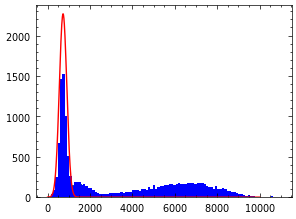

[0.00000000e+000 0.00000000e+000 1.14417166e-130 ... 4.52558263e-088
 0.00000000e+000 0.00000000e+000]
       index  Unnamed: 0    UID            y            x  time  \
0        342        4458    343   286.822785   570.455696   120   
1        347        4523    348   286.878378   363.000000   120   
2        348        4536    349   287.520000   387.440000   120   
3        349        4549    350   287.675325   594.675325   120   
4        350        4562    351   287.040000   777.653333   120   
...      ...         ...    ...          ...          ...   ...   
27981  17134      222754  35266  1889.550725   891.550725   120   
27982  17135      222767  35267  1889.760000   915.986667   120   
27983  17136      222780  35268  1889.890411   940.205479   120   
27984  17138      222806  35270  1890.058824   989.029412   120   
27985  17139      222819  35271  1888.833333  1684.757576   120   

       feat_fq_initial  feat_rox_initial  feat_fq_delta_final  \
0          8369.550827     

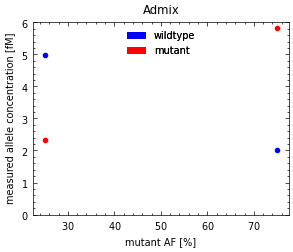

In [4]:
df_example = batch_load_and_combine(PATH_EXAMPLE, 'features_{}.csv'.format(CLASSIFY_FRAME_15h))

df_example, X_pc_example = processKinetics(df_example, forest, scaler, pca, FEATURES_NORM, FEATURES_ORIG)
plt.clf()

df_example['set'] = df_example['set'] + '_example'
print(df_example["set"])

fig = plotAdmix(df_example, [], 'Admix')
plt.ylim(0)
plt.show()